In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
%matplotlib inline


In [4]:
df = pd.read_csv('C:/Users/Jitesh Chandani/Desktop/data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [6]:
df.shape

(41266, 502)

In [12]:
df.dtypes

DATE             int64
SP500          float64
NASDAQ.AAL     float64
NASDAQ.AAPL    float64
NASDAQ.ADBE    float64
                ...   
NYSE.XRX       float64
NYSE.XYL       float64
NYSE.YUM       float64
NYSE.ZBH       float64
NYSE.ZTS       float64
Length: 502, dtype: object

In [14]:
# Check if there are any null values. Since there are many columns, total sum of rows or elements which are null 
# across all columns tells us whether we need to consider to impute or remove those rows
df.isna().sum().sum()

0

In [15]:
# Check if there are any 0 values. Since there are many columns, total sum of rows or elements which have '0' values 
# across all columns tells us whether we need to consider to impute or clean/correct the data in those rows or elements
df[df==0].any().sum()

0

In [16]:
# Check if there are any -ve values. Since there are many columns, total sum of rows or elements which have '-ve' values 
# across all columns tells us whether we need to consider to impute or clean/correct the data in those rows or elements
df[df<0].any().sum()

0

In [17]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [18]:
df['DATE'] = pd.to_datetime(df['DATE'],unit='s')


In [19]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [20]:
stock_data=df.copy()

In [21]:
# Create DF_list1 -> Dictionary which contains all the stocks data items with the Closing values
DF_list = {}
DF_list1 = {}
df2 = pd.DataFrame()
for column in stock_data.columns[1:]:
    try :
        df_col = column.split('.')[1]
        #print(df_col)
    except :
        df_col = column        
        
    Open = stock_data.groupby([stock_data['DATE'].dt.date])[column].first()
    Low = stock_data.groupby([stock_data['DATE'].dt.date])[column].min()
    High = stock_data.groupby([stock_data['DATE'].dt.date])[column].max()
    Close = stock_data.groupby([stock_data['DATE'].dt.date])[column].last()
        
    df = pd.DataFrame([Open,Close,Low,High])
    #df1 = pd.concat([df1,Close])
    df1 = pd.DataFrame([Close])
    
    df = df.transpose()
    df1 = df1.transpose()
    
    df.columns = ['Open','Low','High','Close']
    df1.columns = [df_col]
    
    DF_list[df_col] = df
    DF_list1[df_col] = df1

In [22]:
# Create a DataFrame df5 (Merge all the stock data present in the dictionary DF_list1)
df5 = DF_list1['AAL'].reset_index()
for item in DF_list1.keys():
   
    df5 = pd.merge(df5,DF_list1[item].reset_index())
StockPriceData = df5.drop('DATE', axis=1)
StockPriceData.index = pd.to_datetime(StockPriceData.index)
df5.head()

,DATE,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
0,2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
1,2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2,2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
3,2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
4,2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [23]:
df5['DATE'] = pd.to_datetime(df5['DATE'])

In [24]:
df5.set_index('DATE',inplace=True)
StockPriceData=df5

In [25]:
StockPriceData.index


DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-17',
               ...
               '2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='DATE', length=106, freq=None)

In [26]:
StockPriceData.head()


,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [27]:
#take the apple price and forecase
stockAPPL=pd.DataFrame(StockPriceData.AAPL)

In [28]:
stockAPPL.head()


,AAPL
DATE,
2017-04-03,143.700
2017-04-04,144.770
2017-04-05,144.020
2017-04-06,143.685
2017-04-07,143.340


In [29]:
stockAPPL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AAPL,106.0,150.372602,6.271409,140.68,144.5975,150.065,155.2375,163.98


In [30]:
#Creating a column 'AAPL_LOG' with the log values of 'NASDAQ.AAPL' column data
stockAPPL["AAPL_LOG"] =stockAPPL['AAPL'].apply(lambda x:np.log(x))

In [31]:
StockPriceAPPL=stockAPPL.drop('AAPL',axis=1)

In [32]:
StockPriceAPPL["AAPL_LOG"]

DATE
2017-04-03    4.967728
2017-04-04    4.975146
2017-04-05    4.969952
2017-04-06    4.967623
2017-04-07    4.965219
                ...   
2017-08-25    5.074298
2017-08-28    5.084319
2017-08-29    5.093566
2017-08-30    5.095895
2017-08-31    5.099744
Name: AAPL_LOG, Length: 106, dtype: float64

stock data set contain the stock price data between 2017-04-03 to 2017-08-31

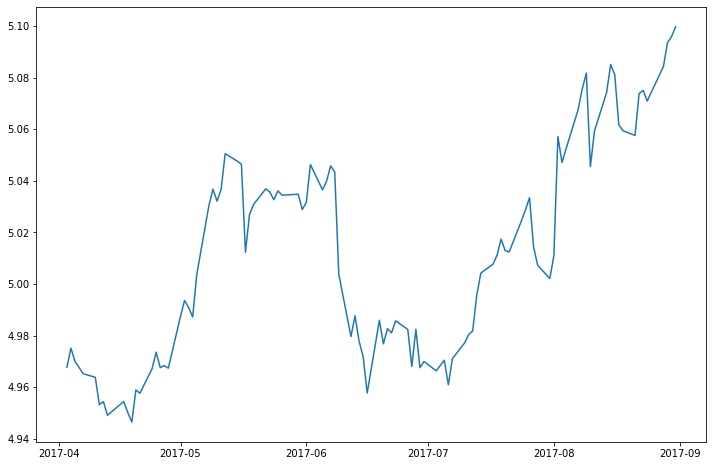

In [33]:
#plot stock AAL
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceAPPL["AAPL_LOG"])

# Plotting Rolling Statistics and check for stationarity :

The function will plot the moving mean or moving Standard Deviation. This is still visual method

NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)

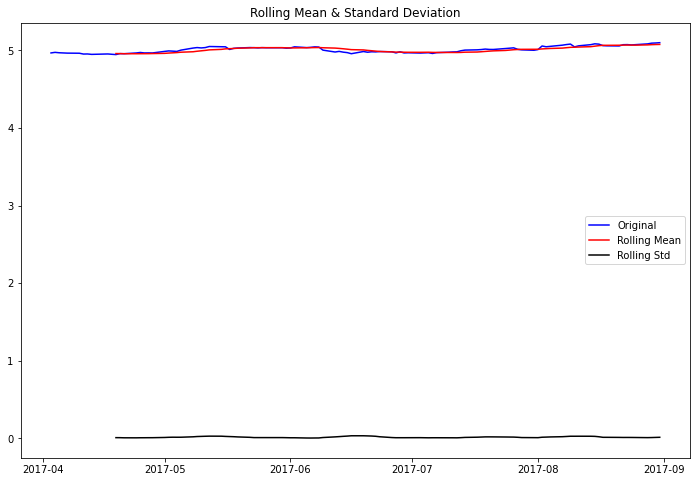

In [34]:
rolmean = StockPriceAPPL.rolling(12).mean()
rolstd = StockPriceAPPL.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceAPPL, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [36]:
adf_check(StockPriceAPPL["AAPL_LOG"])


Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.8416914217030148
p-value : 0.8065678267040395
#Lags Used : 6
Number of Observations Used : 99
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
stockAPPL['AAPL First Diff'] = StockPriceAPPL["AAPL_LOG"] - StockPriceAPPL["AAPL_LOG"].shift(1)
stockAPPL['AAPL First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04    0.007418
2017-04-05   -0.005194
2017-04-06   -0.002329
2017-04-07   -0.002404
Name: AAPL First Diff, dtype: float64

In [38]:
adf_check(stockAPPL['AAPL First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.453733180709958
p-value : 0.0002381644947160968
#Lags Used : 5
Number of Observations Used : 99
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DATE'>

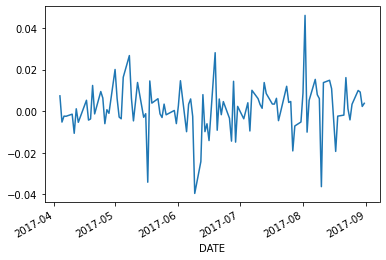

In [39]:
stockAPPL['AAPL First Diff'].plot()

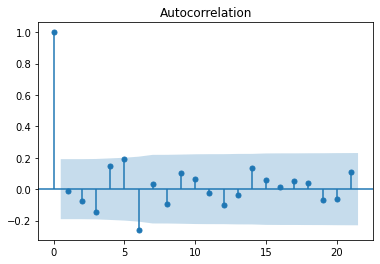

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig_first = plot_acf(stockAPPL['AAPL First Diff'].dropna())

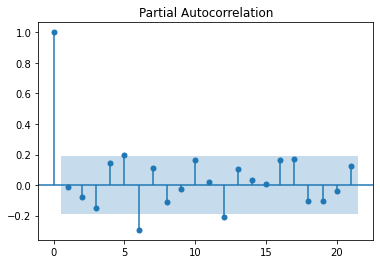

In [41]:
result = plot_pacf(stockAPPL['AAPL First Diff'].dropna())

In [43]:
import warnings
warnings.filterwarnings('ignore')
ararray =stockAPPL['AAPL_LOG'].values
pdq=[]
aic=[]
d=1
for p in range(6):
    for q in range(4):
        
        try:
            model = ARIMA(ararray,order=(p,d,q)) 
            arima_results = model.fit()
            aic.append(arima_results.aic)
            pdq.append((p,d,q))
            print((p,d,q),arima_results.aic)
        except:
            continue
keys = pdq
values = aic

d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

(0, 1, 0) -628.6576453107448
(0, 1, 1) -626.6829727220231
(0, 1, 2) -625.2223108837517
(0, 1, 3) -628.2007750553967
(1, 1, 0) -626.6790832023831
(1, 1, 1) -627.0937989248106
(1, 1, 2) -623.4762933315337
(1, 1, 3) -628.2417299173409
(2, 1, 0) -625.263829207532
(2, 1, 1) -623.6929093403772
(2, 1, 2) -632.1900850514878
(2, 1, 3) -634.3505596491208
(3, 1, 0) -625.4924854024349
(3, 1, 1) -623.9642445007102
(3, 1, 2) -633.5259190448554
(3, 1, 3) -630.2061092039727
(4, 1, 0) -625.5004248605296
(4, 1, 1) -624.309858042019
(4, 1, 2) -625.2503426248295
(4, 1, 3) -630.7238512573183
(5, 1, 0) -627.1189740095865
(5, 1, 1) -632.433558797088
(5, 1, 2) -634.1998607555543
(5, 1, 3) -634.2610531615743
Best Model is : (2, 1, 3)


In [99]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(StockPriceAPPL["AAPL_LOG"],order=(2,1,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-634.3505596491208


In [100]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 -615.7728
Dependent Variable: D.AAPL_LOG       Log-Likelihood:      324.18   
Date:               2021-10-13 14:50 Scale:               1.0000   
No. Observations:   105              Method:              css-mle  
Df Model:           6                Sample:              1        
Df Residuals:       99                                    6        
Converged:          1.0000           S.D. of innovations: 0.011    
No. Iterations:     76.0000          HQIC:                -626.823 
AIC:                -634.3506                                      
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const                0.0013   0.0010  1.2840 0.1991 -0.0007  0.0032
ar.L1.D.AAPL_LOG    -0.4177   0.1088 -3.8383 0.0001 -0.6310 -0.2044
ar.L2.D.AAPL_LOG    -0.6955   0.1445 -4.8130 0.0000 -0.9787 -0.4123
ma.L1.D.AAPL_LOG     0.4673   0.1277  3.6582 0.0003  0.2169  0.7177
ma.L2.D.AAPL_LOG     0.7128   0.1476  4.8303 0.0000  0.4236  1.0021
ma.L3.D.AAPL_LOG    -0.2395   0.1103 -2.1710 0.0299 -0.4557 -0.0233
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -0.3003            -1.1609           1.1991            -0.2903
AR.2          -0.3003             1.1609           1.1991             0.2903
MA.1          -0.4037            -0.9698           1.0505            -0.3128
MA.2          -0.4037             0.9698           1.0505             0.3128
MA.3           3.7835            -0.0000           3.7835            -0.0000
===================================================================

"""

In [101]:
StockPriceAPPL["AAPL_LOG"].shape

(106,)

In [102]:
model_arima_fit.forecast(10)

(array([5.10177605, 5.1024722 , 5.10262422, 5.10475061, 5.10643077,
        5.10692416, 5.1082236 , 5.11001175, 5.11103516, 5.11203811]),
 array([0.01096873, 0.01590151, 0.01961009, 0.02136736, 0.02349104,
        0.02607089, 0.02784313, 0.02936761, 0.03121767, 0.03289464]),
 array([[5.08027773, 5.12327436],
        [5.07130581, 5.13363859],
        [5.06418915, 5.14105929],
        [5.06287136, 5.14662986],
        [5.06038918, 5.15247236],
        [5.05582614, 5.15802217],
        [5.05365207, 5.16279513],
        [5.05245228, 5.16757121],
        [5.04984965, 5.17222067],
        [5.0475658 , 5.17651042]]))

In [103]:
model_arima_fit.forecast(16)[0]

array([5.10177605, 5.1024722 , 5.10262422, 5.10475061, 5.10643077,
       5.10692416, 5.1082236 , 5.11001175, 5.11103516, 5.11203811,
       5.11358147, 5.11491334, 5.1159577 , 5.11726924, 5.11866914,
       5.11984631])

# Now predict the ADP

In [48]:
#take the apple price and forecast
stockADP=pd.DataFrame(StockPriceData.ADP)

In [49]:
stockADP.head()


,ADP
DATE,
2017-04-03,101.27
2017-04-04,101.45
2017-04-05,101.93
2017-04-06,101.75
2017-04-07,102.19


In [50]:
stockADP.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ADP,106.0,103.468726,4.424074,96.46,101.31625,102.44,104.5875,118.91


In [51]:
#Creating a column 'ADP_LOG' with the log values of 'NASDAQ.ADP' column data
stockADP["ADP_LOG"] =stockADP['ADP'].apply(lambda x:np.log(x))

In [53]:
StockPriceADP=stockADP.drop('ADP',axis=1)

In [54]:
StockPriceADP["ADP_LOG"]

DATE
2017-04-03    4.617790
2017-04-04    4.619566
2017-04-05    4.624286
2017-04-06    4.622519
2017-04-07    4.626834
                ...   
2017-08-25    4.650048
2017-08-28    4.651672
2017-08-29    4.655198
2017-08-30    4.662778
2017-08-31    4.667863
Name: ADP_LOG, Length: 106, dtype: float64

In [55]:
StockPriceADP["ADP_LOG"].head()

DATE
2017-04-03    4.617790
2017-04-04    4.619566
2017-04-05    4.624286
2017-04-06    4.622519
2017-04-07    4.626834
Name: ADP_LOG, dtype: float64

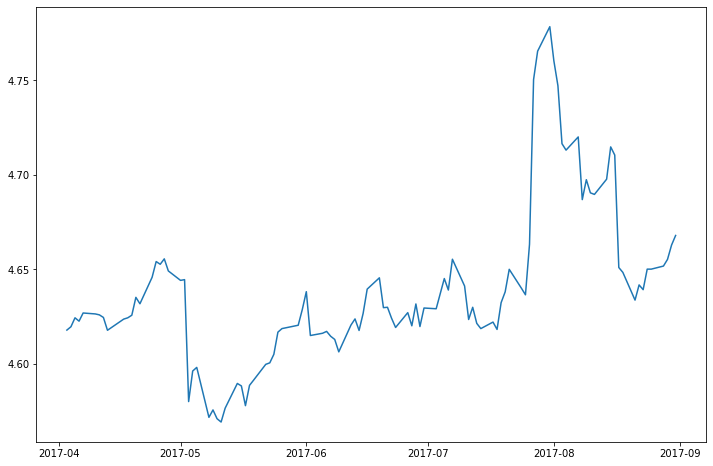

In [56]:
#plot stock AAL
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceADP["ADP_LOG"])

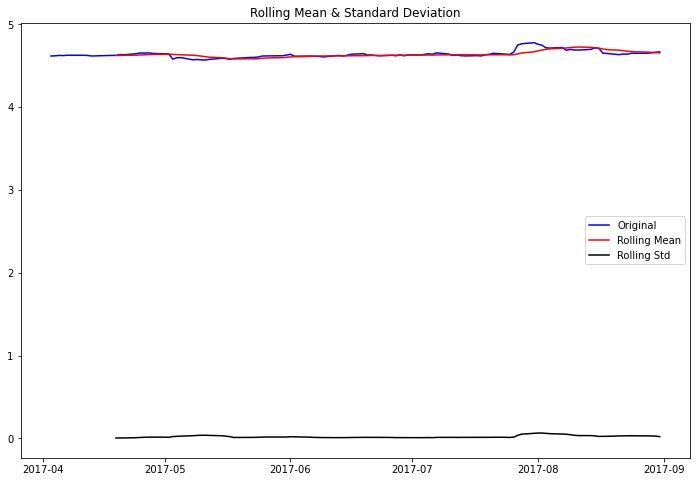

In [57]:
rolmean = StockPriceADP.rolling(12).mean()
rolstd = StockPriceADP.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceADP, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [58]:
adf_check(StockPriceADP["ADP_LOG"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.9274461474815063
p-value : 0.31926175042941074
#Lags Used : 0
Number of Observations Used : 105
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [59]:
stockADP['ADP First Diff'] = StockPriceADP["ADP_LOG"] - StockPriceADP["ADP_LOG"].shift(1)
stockADP['ADP First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04    0.001776
2017-04-05    0.004720
2017-04-06   -0.001767
2017-04-07    0.004315
Name: ADP First Diff, dtype: float64

In [60]:
adf_check(stockADP['ADP First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.357064875158601
p-value : 8.006428135800317e-16
#Lags Used : 0
Number of Observations Used : 104
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DATE'>

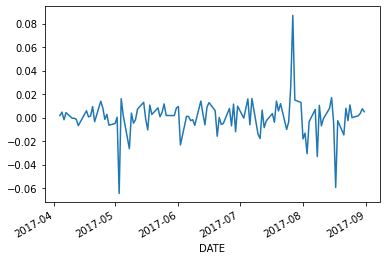

In [61]:
stockADP['ADP First Diff'].plot()

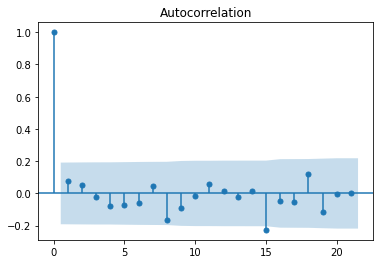

In [62]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig_first = plot_acf(stockADP['ADP First Diff'].dropna())

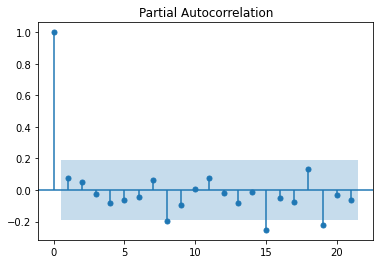

In [63]:
result = plot_pacf(stockADP['ADP First Diff'].dropna())

In [104]:
model_arima = ARIMA(StockPriceADP["ADP_LOG"],order=(2,1,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-562.2823171595559


In [105]:
model_arima_fit.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 -543.7046
Dependent Variable: D.ADP_LOG        Log-Likelihood:      288.14   
Date:               2021-10-13 14:50 Scale:               1.0000   
No. Observations:   105              Method:              css-mle  
Df Model:           6                Sample:              1        
Df Residuals:       99                                    6        
Converged:          1.0000           S.D. of innovations: 0.015    
No. Iterations:     43.0000          HQIC:                -554.754 
AIC:                -562.2823                                      
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               0.0005   0.0017   0.3056 0.7599 -0.0028  0.0038
ar.L1.D.ADP_LOG     0.1688   0.0814   2.0732 0.0382  0.0092  0.3284
ar.L2.D.ADP_LOG    -0.9216   0.0519 -17.7551 0.0000 -1.0233 -0.8198
ma.L1.D.ADP_LOG    -0.1015   0.1242  -0.8169 0.4140 -0.3449  0.1420
ma.L2.D.ADP_LOG     0.9896   0.0434  22.8203 0.0000  0.9046  1.0746
ma.L3.D.ADP_LOG     0.0632   0.1078   0.5861 0.5578 -0.1482  0.2746
---------------------------------------------------------------------------
                 Real           Imaginary         Modulus         Frequency
---------------------------------------------------------------------------
AR.1             0.0916           -1.0377          1.0417           -0.2360
AR.2             0.0916            1.0377          1.0417            0.2360
MA.1             0.0823           -0.9966          1.0000           -0.2369
MA.2             0.0823            0.9966          1.0000            0.2369
MA.3           -15.8208           -0.0000         15.8208           -0.5000
===================================================================

"""

In [106]:
model_arima_fit.forecast(16)[0]

array([4.66785014, 4.67079795, 4.67260909, 4.67109298, 4.67006264,
       4.67218061, 4.67438242, 4.67369701, 4.6724469 , 4.67376221,
       4.67603105, 4.67609665, 4.67491156, 4.67554575, 4.67763967,
       4.67830345])

# Predicting CBOE

In [67]:
#take the CBOE price and forecast
stockCBOE=pd.DataFrame(StockPriceData.CBOE)

In [68]:
stockCBOE.head()

,CBOE
DATE,
2017-04-03,80.67
2017-04-04,80.89
2017-04-05,80.42
2017-04-06,80.32
2017-04-07,81.08


In [69]:
stockCBOE.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CBOE,106.0,89.398774,5.757677,80.32,84.1525,89.58,93.4975,100.89


In [70]:
#Creating a column 'CBOE_LOG' with the log values of 'NASDAQ.CBOE' column data
stockCBOE["CBOE_LOG"] =stockCBOE['CBOE'].apply(lambda x:np.log(x))

In [71]:
StockPriceCBOE=stockCBOE.drop('CBOE',axis=1)

In [72]:
StockPriceCBOE["CBOE_LOG"]

DATE
2017-04-03    4.390367
2017-04-04    4.393090
2017-04-05    4.387263
2017-04-06    4.386019
2017-04-07    4.395436
                ...   
2017-08-25    4.602868
2017-08-28    4.606669
2017-08-29    4.608564
2017-08-30    4.607867
2017-08-31    4.614031
Name: CBOE_LOG, Length: 106, dtype: float64

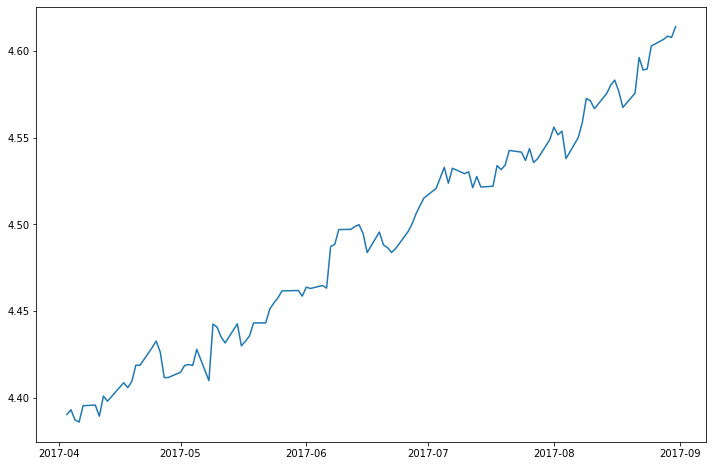

In [73]:
#plot stock AAL
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceCBOE["CBOE_LOG"])

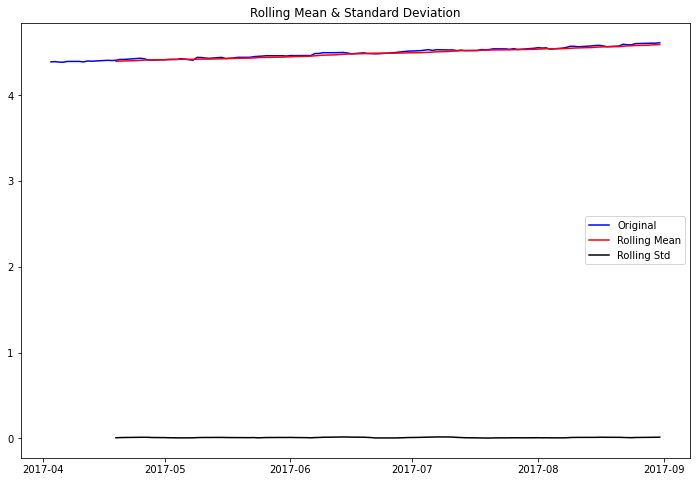

In [74]:
rolmean = StockPriceCBOE.rolling(12).mean()
rolstd = StockPriceCBOE.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceCBOE, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [75]:
adf_check(StockPriceCBOE["CBOE_LOG"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.1511952083547288
p-value : 0.969387539657401
#Lags Used : 1
Number of Observations Used : 104
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [76]:
stockCBOE['CBOE First Diff'] = StockPriceCBOE["CBOE_LOG"] - StockPriceCBOE["CBOE_LOG"].shift(1)
stockCBOE['CBOE First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04    0.002723
2017-04-05   -0.005827
2017-04-06   -0.001244
2017-04-07    0.009418
Name: CBOE First Diff, dtype: float64

In [77]:
adf_check(stockCBOE['CBOE First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -13.24572391243465
p-value : 8.982796302540516e-25
#Lags Used : 0
Number of Observations Used : 104
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DATE'>

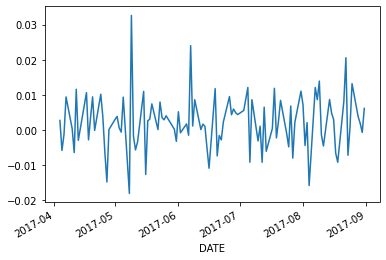

In [78]:
stockCBOE['CBOE First Diff'].plot()

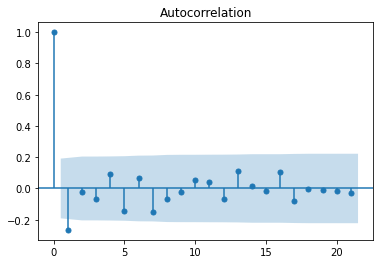

In [79]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig_first = plot_acf(stockCBOE['CBOE First Diff'].dropna())

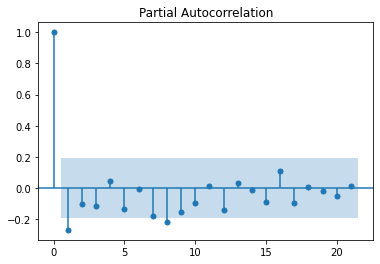

In [80]:
result = plot_pacf(stockCBOE['CBOE First Diff'].dropna())

In [115]:
model_arima = ARIMA(StockPriceCBOE["CBOE_LOG"])
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-724.2724069853471


In [109]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 -700.3868
Dependent Variable: D.CBOE_LOG       Log-Likelihood:      371.14   
Date:               2021-10-13 14:51 Scale:               1.0000   
No. Observations:   105              Method:              css-mle  
Df Model:           8                Sample:              1        
Df Residuals:       97                                    6        
Converged:          1.0000           S.D. of innovations: 0.007    
No. Iterations:     56.0000          HQIC:                -714.593 
AIC:                -724.2724                                      
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const                0.0021   0.0000 42.4341 0.0000  0.0020  0.0022
ar.L1.D.CBOE_LOG     0.8597   0.4917  1.7485 0.0804 -0.1040  1.8234
ar.L2.D.CBOE_LOG    -0.0533   0.3041 -0.1751 0.8610 -0.6493  0.5428
ar.L3.D.CBOE_LOG    -0.0396   0.1408 -0.2812 0.7785 -0.3156  0.2364
ar.L4.D.CBOE_LOG     0.0847   0.1265  0.6700 0.5029 -0.1631  0.3326
ar.L5.D.CBOE_LOG    -0.1693   0.1034 -1.6371 0.1016 -0.3720  0.0334
ma.L1.D.CBOE_LOG    -1.3016   0.5022 -2.5919 0.0095 -2.2858 -0.3173
ma.L2.D.CBOE_LOG     0.3016   0.5013  0.6016 0.5474 -0.6809  1.2841
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.1343            -0.4217           1.2102            -0.0566
AR.2           1.1343             0.4217           1.2102             0.0566
AR.3          -0.0825            -1.5841           1.5862            -0.2583
AR.4          -0.0825             1.5841           1.5862             0.2583
AR.5          -1.6031            -0.0000           1.6031            -0.5000
MA.1           1.0000             0.0000           1.0000             0.0000
MA.2           3.3159             0.0000           3.3159             0.0000
===================================================================

"""

In [110]:
model_arima_fit.forecast(16)[0]

array([4.61020654, 4.60875614, 4.60774555, 4.60840265, 4.60836799,
       4.60952446, 4.61131118, 4.61367053, 4.6161005 , 4.61875379,
       4.62142438, 4.624037  , 4.62649904, 4.62884101, 4.63105374,
       4.63315986])

# Predicting CSCO

In [84]:
#take the CSCO price and forecast
stockCSCO=pd.DataFrame(StockPriceData.CSCO)

In [85]:
stockCSCO.head()

,CSCO
DATE,
2017-04-03,33.580
2017-04-04,33.410
2017-04-05,33.000
2017-04-06,33.075
2017-04-07,32.960


In [86]:
stockCSCO.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CSCO,106.0,32.129151,0.993225,30.37,31.4825,31.78,32.7825,34.39


In [87]:
#Creating a column 'CSCO_LOG' with the log values of 'NASDAQ.CSCO' column data
stockCSCO["CSCO_LOG"] =stockCSCO['CSCO'].apply(lambda x:np.log(x))
StockPriceCSCO=stockCSCO.drop('CSCO',axis=1)
StockPriceCSCO["CSCO_LOG"]

DATE
2017-04-03    3.513931
2017-04-04    3.508855
2017-04-05    3.496508
2017-04-06    3.498778
2017-04-07    3.495295
                ...   
2017-08-25    3.448081
2017-08-28    3.451257
2017-08-29    3.449352
2017-08-30    3.465423
2017-08-31    3.472743
Name: CSCO_LOG, Length: 106, dtype: float64

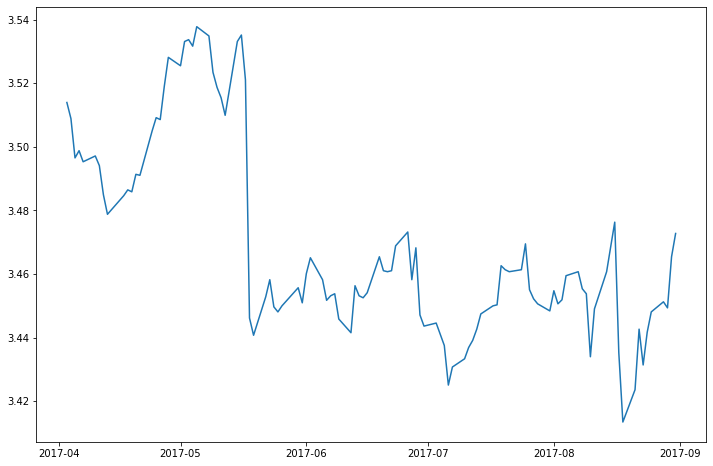

In [88]:
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceCSCO["CSCO_LOG"])

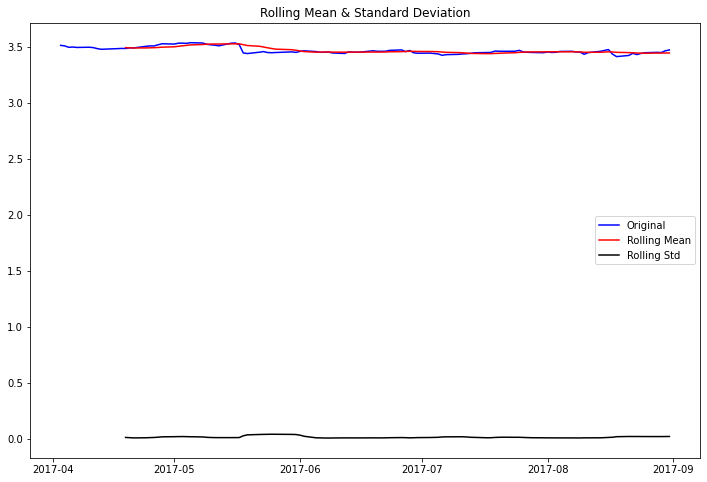

In [89]:
rolmean = StockPriceCSCO.rolling(12).mean()
rolstd = StockPriceCSCO.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceCSCO, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [90]:
adf_check(StockPriceCSCO["CSCO_LOG"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.969207493346841
p-value : 0.3002355567588244
#Lags Used : 2
Number of Observations Used : 103
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [91]:
stockCSCO['CSCO First Diff'] = StockPriceCSCO["CSCO_LOG"] - StockPriceCSCO["CSCO_LOG"].shift(1)
stockCSCO['CSCO First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04   -0.005075
2017-04-05   -0.012348
2017-04-06    0.002270
2017-04-07   -0.003483
Name: CSCO First Diff, dtype: float64

In [92]:
adf_check(stockCSCO['CSCO First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.237362416810142
p-value : 1.9239138164285599e-10
#Lags Used : 2
Number of Observations Used : 102
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DATE'>

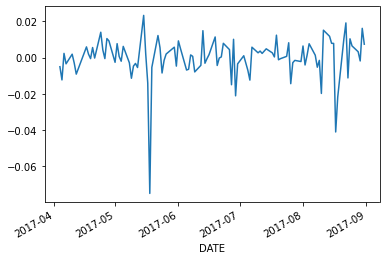

In [93]:
stockCSCO['CSCO First Diff'].plot()

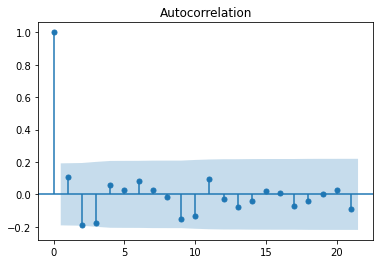

In [94]:
fig_first = plot_acf(stockCSCO['CSCO First Diff'].dropna())

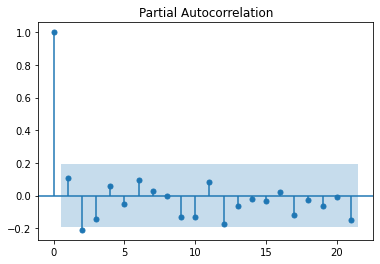

In [95]:
result = plot_pacf(stockCSCO['CSCO First Diff'].dropna())

In [111]:
model_arima = ARIMA(StockPriceCSCO["CSCO_LOG"],order=(2,1,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-631.4141994762937


In [112]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 -612.8365
Dependent Variable: D.CSCO_LOG       Log-Likelihood:      322.71   
Date:               2021-10-13 14:52 Scale:               1.0000   
No. Observations:   105              Method:              css-mle  
Df Model:           6                Sample:              1        
Df Residuals:       99                                    6        
Converged:          1.0000           S.D. of innovations: 0.011    
No. Iterations:     77.0000          HQIC:                -623.886 
AIC:                -631.4142                                      
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               -0.0004   0.0009 -0.4663 0.6410 -0.0022  0.0013
ar.L1.D.CSCO_LOG    -0.5090   0.4166 -1.2219 0.2217 -1.3256  0.3075
ar.L2.D.CSCO_LOG     0.0688   0.3178  0.2163 0.8287 -0.5542  0.6917
ma.L1.D.CSCO_LOG     0.6278   0.4074  1.5410 0.1233 -0.1707  1.4262
ma.L2.D.CSCO_LOG    -0.1910   0.3400 -0.5618 0.5743 -0.8574  0.4754
ma.L3.D.CSCO_LOG    -0.2739   0.1060 -2.5839 0.0098 -0.4816 -0.0661
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -1.6130             0.0000           1.6130             0.5000
AR.2           9.0158             0.0000           9.0158             0.0000
MA.1           1.7677            -0.0000           1.7677            -0.0000
MA.2          -1.2326            -0.7391           1.4372            -0.4140
MA.3          -1.2326             0.7391           1.4372             0.4140
===================================================================

"""

In [113]:
model_arima_fit.forecast(16)[0]

array([3.47054006, 3.46579576, 3.46537743, 3.464668  , 3.46440421,
       3.46389356, 3.46353921, 3.46308833, 3.46269733, 3.46226921,
       3.46186411, 3.46144473, 3.46103421, 3.46061819, 3.46020558,
       3.45979086])

# Predicting Ebay

In [116]:
#take the EBAY price and forecast
stockEBAY=pd.DataFrame(StockPriceData.EBAY)

In [117]:
stockEBAY.head()

,EBAY
DATE,
2017-04-03,33.76
2017-04-04,34.14
2017-04-05,33.81
2017-04-06,34.16
2017-04-07,33.91


In [118]:
stockEBAY.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EBAY,106.0,34.791981,1.102618,32.05,34.0375,34.81,35.53,37.18


In [119]:
#Creating a column 'EBAY_LOG' with the log values of 'NASDAQ.EBAY' column data
stockEBAY["EBAY_LOG"] =stockEBAY['EBAY'].apply(lambda x:np.log(x))
StockPriceEBAY=stockEBAY.drop('EBAY',axis=1)
StockPriceEBAY["EBAY_LOG"]

DATE
2017-04-03    3.519277
2017-04-04    3.530470
2017-04-05    3.520757
2017-04-06    3.531055
2017-04-07    3.523710
                ...   
2017-08-25    3.546163
2017-08-28    3.549905
2017-08-29    3.561046
2017-08-30    3.574871
2017-08-31    3.587124
Name: EBAY_LOG, Length: 106, dtype: float64

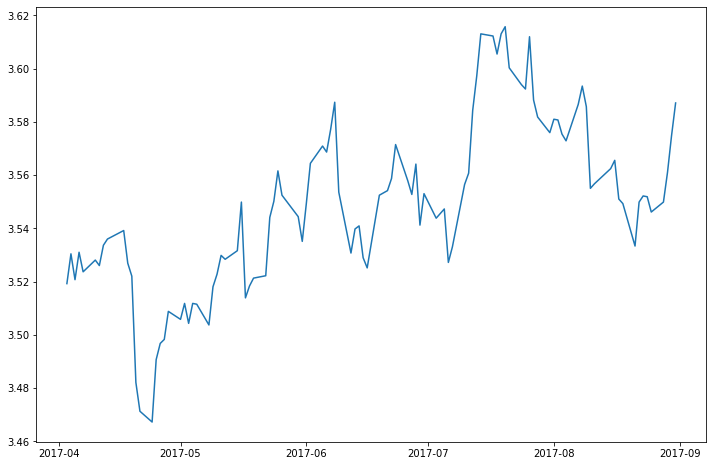

In [120]:
#plot stock AAL
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceEBAY["EBAY_LOG"])

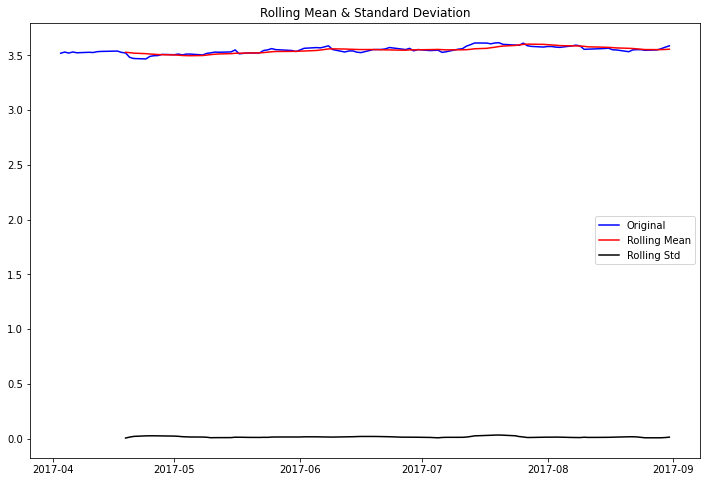

In [121]:
rolmean = StockPriceEBAY.rolling(12).mean()
rolstd = StockPriceEBAY.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceEBAY, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [122]:
adf_check(StockPriceEBAY["EBAY_LOG"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.9962978634802515
p-value : 0.2881987125649663
#Lags Used : 0
Number of Observations Used : 105
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [123]:
stockEBAY['EBAY First Diff'] = StockPriceEBAY["EBAY_LOG"] - StockPriceEBAY["EBAY_LOG"].shift(1)
stockEBAY['EBAY First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04    0.011193
2017-04-05   -0.009713
2017-04-06    0.010299
2017-04-07   -0.007345
Name: EBAY First Diff, dtype: float64

In [124]:
adf_check(stockEBAY['EBAY First Diff'].dropna())


Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.122273559572955
p-value : 0.0008895990751206726
#Lags Used : 6
Number of Observations Used : 98
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DATE'>

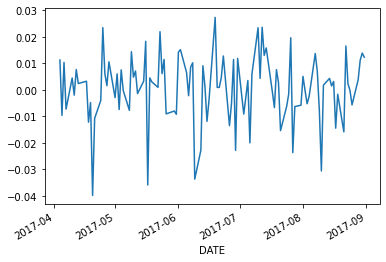

In [125]:
stockEBAY['EBAY First Diff'].plot()

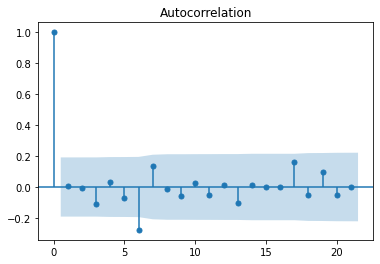

In [126]:
fig_first = plot_acf(stockEBAY['EBAY First Diff'].dropna())

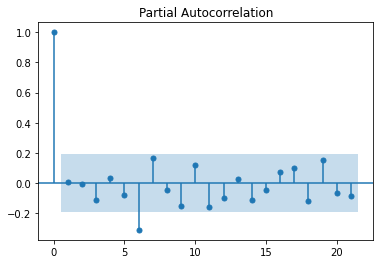

In [127]:
result = plot_pacf(stockEBAY['EBAY First Diff'].dropna())

In [128]:
model_arima = ARIMA(StockPriceEBAY["EBAY_LOG"],order=(2,1,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-620.0968730337498


In [129]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 -601.5192
Dependent Variable: D.EBAY_LOG       Log-Likelihood:      317.05   
Date:               2021-10-13 14:55 Scale:               1.0000   
No. Observations:   105              Method:              css-mle  
Df Model:           6                Sample:              1        
Df Residuals:       99                                    6        
Converged:          1.0000           S.D. of innovations: 0.012    
No. Iterations:     35.0000          HQIC:                -612.569 
AIC:                -620.0969                                      
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const                0.0006   0.0012  0.5119 0.6087 -0.0017  0.0029
ar.L1.D.EBAY_LOG    -0.8103   0.1128 -7.1803 0.0000 -1.0314 -0.5891
ar.L2.D.EBAY_LOG    -0.6719   0.0919 -7.3094 0.0000 -0.8520 -0.4917
ma.L1.D.EBAY_LOG     0.9018   0.1409  6.3985 0.0000  0.6255  1.1780
ma.L2.D.EBAY_LOG     0.8177   0.1403  5.8292 0.0000  0.5428  1.0926
ma.L3.D.EBAY_LOG    -0.1701   0.1360 -1.2503 0.2112 -0.4367  0.0965
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -0.6030            -1.0606           1.2200            -0.3323
AR.2          -0.6030             1.0606           1.2200             0.3323
MA.1          -0.5359            -0.8443           1.0000            -0.3400
MA.2          -0.5359             0.8443           1.0000             0.3400
MA.3           5.8795            -0.0000           5.8795            -0.0000
===================================================================

"""

In [130]:
model_arima_fit.forecast(16)[0]

array([3.58631071, 3.58764914, 3.58665975, 3.58803407, 3.58905712,
       3.5887767 , 3.58978845, 3.59062894, 3.59074004, 3.59155721,
       3.59229232, 3.59261954, 3.59333239, 3.59400682, 3.59445329,
       3.59511029])